<a href="https://colab.research.google.com/github/suvaline/DeepLearningComparison/blob/master/Feed_Forward_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load data
import keras
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist, cifar10, cifar100

Using TensorFlow backend.


In [0]:
batch_size = 128

epochs = 10
dataset_name = "mnist" 
max_pooling = False
dropout = False
# input image dimensions
if(dataset_name == "mnist"):
  num_classes = 10
  img_rows, img_cols = 28, 28
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  color_count = 1
if(dataset_name == "cifar10"):
  num_classes = 10
  img_rows, img_cols = 32, 32
  (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
  color_count = 3
if(dataset_name == "cifar100"):
  num_classes = 100
  img_rows, img_cols = 32, 32
  (train_images, train_labels), (test_images, test_labels) = cifar100.load_data()
  color_count = 3
# the data, split between train and test sets


11493376/11490434 [==============================] - 2s 0us/step


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Image : 7')

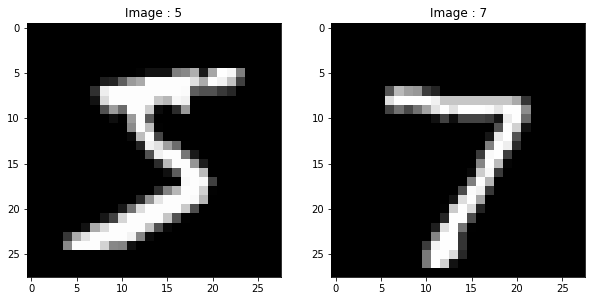

In [0]:

print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Image : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Image : {}".format(test_labels[0]))


In [0]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)
dimData

784

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense
def feed_forward_network(depth, width, dimData, nClasses):
  model = Sequential()
  #input layer/first hidden layer
  model.add(Dense(width, activation='relu', input_shape=(dimData,)))
  if dropout == True:
    model.add(Dropout(0.25))
  i = 0
  #hidden layers
  while i<depth-1:
    model.add(Dense(width, activation = 'relu'))
    print("dropout:",dropout)
    if dropout == True:
      model.add(Dropout(0.25))
    i += 1
  #output layer
  model.add(Dense(nClasses, activation='softmax'))
  return model
def create_2d_array(x,y):
  a = [0] * x
  for i in range(x):
    a[i] = [0] * y
  return a
def create_3d_array(x,y,z):
  return np.zeros((x,y,z))
  

In [0]:
def plot(history):
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()
 
#Plot the Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['acc'],'r',linewidth=3.0)
  plt.plot(history.history['val_acc'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)
  plt.show()

def create_heatmaps(rows, columns, array, create_max_heatmap = 'false'):
  print("mean heatmap:")
  mean_array = np.mean(array, axis=2)
  ax = sns.heatmap(mean_array, linewidth=0.5,vmin=0, vmax=1, annot=True)
  plt.show()
  last_loss_array = create_2d_array(rows, columns)
  for i in range(rows):
    for j in range(columns):
      last_loss_array[i][j] = array[i][j][epochs-1]
  
  print("last result heatmap:")
  ax = sns.heatmap(last_loss_array, linewidth=0.5,vmin=0, vmax=1, annot=True)
  plt.show()
  if create_max_heatmap == 'true':
    print("max heatmap :")
    max_array = np.amax(array, axis=2)
    ax = sns.heatmap(max_array, linewidth=0.5,vmin=0, vmax=1, annot=True)
    plt.show()

def show_heatmaps(arrays, depth, width):
  loss_array = arrays[0]
  val_loss_array = arrays[1]
  acc_array = arrays[2]
  val_acc_array = arrays[3]
  print("loss heatmaps :")
  create_heatmaps(depth, width, loss_array)
  print("validation loss heatmaps :")
  create_heatmaps(depth, width, val_loss_array)
  print("accuracy heatmaps :")
  create_heatmaps(depth, width, acc_array, create_max_heatmap = 'true')
  print("validation accuracy heatmaps :")
  create_heatmaps(depth, width, val_acc_array, create_max_heatmap = 'true')
def generate_train_and_plot(depth, multiplier, arrays, max_depth, width_multiplier):
  original_multiplier = multiplier
  loss_array = arrays[0]
  val_loss_array = arrays[1]
  acc_array = arrays[2]
  val_acc_array = arrays[3]
  while depth < max_depth:
    multiplier = original_multiplier
    while multiplier < width_multiplier:
      model = feed_forward_network(depth + 1, 5 + 40 * multiplier, dimData, num_classes)
      model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])
      model.summary()
      history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                    validation_data=(test_data, test_labels_one_hot))
      print("depth :", depth, "multiplier", multiplier)
      loss_array[depth][multiplier] = history.history['loss']
      print("loss_array =", loss_array)
      val_loss_array[depth][multiplier] = history.history['val_loss']
      print("val_loss_array =", val_loss_array)
      acc_array[depth][multiplier] = history.history['acc']
      print("accuracy_array =", acc_array)
      val_acc_array[depth][multiplier] = history.history['val_acc']
      print("val_accuracy_array =", val_acc_array)
      multiplier += 1
      keras.backend.clear_session()
    depth += 1
    print("depth : ", depth)
  arrays = [loss_array, val_loss_array, acc_array, val_acc_array]
  return arrays
  

In [0]:
max_depth = 5
width_multiplier = 5
arrays = [create_2d_array(max_depth, width_multiplier), create_2d_array(max_depth, width_multiplier), create_2d_array(max_depth, width_multiplier), create_2d_array(max_depth, width_multiplier)]
arrays = generate_train_and_plot(0,0,arrays,max_depth,width_multiplier)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.9400 - acc: 0.7107 - val_loss: 0.6202 - val_acc: 0.8128
Epoch 2/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.5693 - acc: 0.8308 - val_loss: 0.5256 - val_acc: 0.8476
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.5106 - acc:

In [0]:
show_heatmaps(arrays, max_depth, width_multiplier)